In [1]:
import geopandas as gpd
import contextily as cx
import pandas as pd
%matplotlib inline
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy as sp
from sklearn.preprocessing import LabelEncoder
from datetime import date

In [5]:
analysis_dataset_path = '/Users/zhu/Dropbox/Code/Publications/RACM2B-VCP-analysis-data/'
datapath = analysis_dataset_path+'AQS/'
shapefile = gpd.read_file(analysis_dataset_path+"LA_Merge/LA_Merge.shp")

In [10]:
df_wrfs = []
df_wrfs.append(pd.read_csv(datapath+'aqs_wrf_chem_vcp_noI_phot_4km.csv'))
df_wrfs.append(pd.read_csv(datapath+'aqs_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km.csv'))


In [11]:

    
gdfs = []
for j in range(len(df_wrfs)):
    
    gdfs.append(gpd.GeoDataFrame(
        df_wrf, geometry=gpd.points_from_xy(df_wrf['longitude'], df_wrf['latitude'])))

In [12]:
lons = np.sort(gdfs[0].query('cls_indxs<5')['longitude'].unique())

In [13]:
indx = (df_wrfs[0]['longitude'] == lons[4]) 
df_pasadena = df_wrfs[0].loc[indx,:]
df_pasadena = df_pasadena.dropna(subset=['OZONE','o3'])


indx = (df_wrfs[1]['longitude'] == lons[4]) 
df_pasadena_v1 = df_wrfs[1].loc[indx,:]
df_pasadena_v1 = df_pasadena_v1.dropna(subset=['OZONE','o3'])

Text(0.5, 0, '')

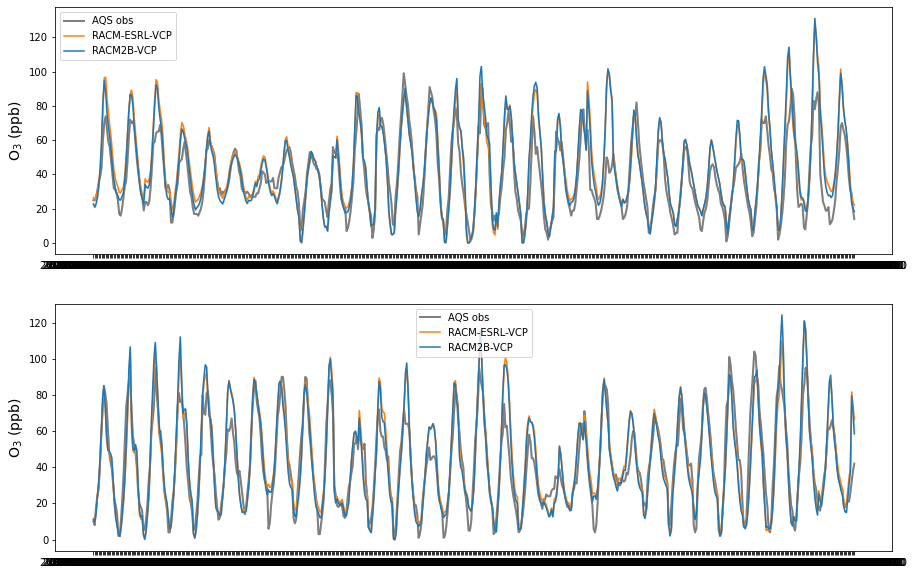

In [14]:
plt.figure(figsize=(15,10))
#plt.subplot(3,1,1)
#sns.lineplot(x='hour',y='OZONE',data=df_pasadena)
#sns.lineplot(x='hour',y='o3',data=df_pasadena)

plt.subplot(2,1,1)
sns.lineplot(x='time_local',y='OZONE',data=df_pasadena.query('month==6'),label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='o3',data=df_pasadena.query('month==6'),label='RACM-ESRL-VCP',color='tab:orange')
sns.lineplot(x='time_local',y='o3',data=df_pasadena_v1.query('month==6'),label='RACM2B-VCP',color='tab:blue')
plt.ylabel('O$_3$ (ppb)',fontsize=14)
plt.xlabel('')

plt.subplot(2,1,2)
sns.lineplot(x='time_local',y='OZONE',data=df_pasadena.query('month==8'),label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='o3',data=df_pasadena.query('month==8'),label='RACM-ESRL-VCP',color='tab:orange')
sns.lineplot(x='time_local',y='o3',data=df_pasadena_v1.query('month==8'),label='RACM2B-VCP',color='tab:blue')
plt.ylabel('O$_3$ (ppb)',fontsize=14)
plt.xlabel('')

Text(0.5, 0, '')

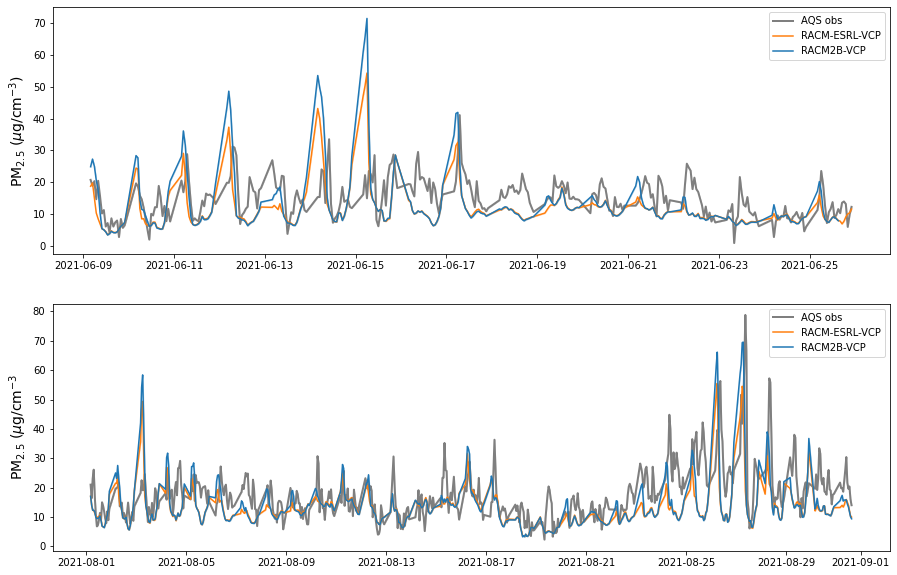

In [114]:
plt.figure(figsize=(15,10))
#plt.subplot(3,1,1)
#sns.lineplot(x='hour',y='OZONE',data=df_pasadena)
#sns.lineplot(x='hour',y='o3',data=df_pasadena)
indx = (df_wrfs[0]['longitude'] == lons[11]) 
this_df = df_wrfs[0].loc[indx,:]
#print(this_df.dropna(subset=['PM2_5_DRY','PM2.5']).shape)
this_df = this_df.dropna(subset=['PM2_5_DRY','PM2.5'])


indx = (df_wrfs[1]['longitude'] == lons[11]) 
this_df_v1 = df_wrfs[1].loc[indx,:]
this_df_v1 = this_df_v1.dropna(subset=['PM2_5_DRY','PM2.5'])

plt.subplot(2,1,1)
sns.lineplot(x='time_local',y='PM2.5',data=this_df.query('month==6 & day >8 & day<26'),label='AQS obs',color='tab:gray',linewidth=2)
#sns.lineplot(x='time_local',y='PM2.5',data=this_df_v1.query('month==6'),label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='PM2_5_DRY',data=this_df.query('month==6 & day >8 & day<26'),label='RACM-ESRL-VCP',color='tab:orange')
sns.lineplot(x='time_local',y='PM2_5_DRY',data=this_df_v1.query('month==6 & day >8 & day<26'),label='RACM2B-VCP',color='tab:blue')
plt.ylabel('PM$_{2.5}$ ($\mu$g/cm$^{-3}$)',fontsize=14)
plt.xlabel('')

plt.subplot(2,1,2)
sns.lineplot(x='time_local',y='PM2.5',data=this_df.query('month==8'),label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='PM2_5_DRY',data=this_df.query('month==8'),label='RACM-ESRL-VCP',color='tab:orange')
sns.lineplot(x='time_local',y='PM2_5_DRY',data=this_df_v1.query('month==8'),label='RACM2B-VCP',color='tab:blue')
plt.ylabel('PM$_{2.5}$ ($\mu$g/cm$^{-3}$',fontsize=14)
plt.xlabel('')

In [6]:
mdas = []
gmdas = []
for i in range(len(gdfs)):
    mda = pd.DataFrame()

    lons = np.sort(gdfs[i].query('cls_indxs<5')['longitude'].unique())
    dates = gdfs[i]['date'].unique()[:-1]
    n=0
    for i_lon, lon in enumerate(lons):
        for date in dates:

            indx = (gdfs[i]['date'] == date) & (gdfs[0]['longitude'] == lon) 
            if len(gdfs[i].loc[indx,'latitude'].values)>0:
                this_gdf = gdfs[i].loc[indx,:].dropna(subset=['OZONE']).groupby(['time_local']).mean()
                mda.loc[n, 'OZONE'] = this_gdf.sort_values(by='OZONE', ascending=False)['OZONE'][:8].mean()
                mda.loc[n, 'o3'] = this_gdf.sort_values(by='o3', ascending=False)['o3'][:8].mean()

                this_gdf = gdfs[i].loc[indx,:].dropna(subset=['PM2.5'])
                mda.loc[n, 'PM2_5_DRY'] = this_gdf['PM2_5_DRY'].mean()
                mda.loc[n, 'PM2.5'] = this_gdf['PM2.5'].mean()

                this_gdf = gdfs[i].loc[indx,:].dropna(subset=['TEMP'])
                mda.loc[n, 'TEMP'] = this_gdf['TEMP'].mean()
                #print(gdfs[0].loc[indx,:].sort_values(by='OZONE', ascending=False)[['time_local','OZONE']])
                mda.loc[n, 'latitude'] = gdfs[i].loc[indx,'latitude'].values[0]
                mda.loc[n, 'longitude'] = lon
                mda.loc[n, 'date'] = date
                mda.loc[n, 'weekday'] = gdfs[i].loc[indx,'weekday'].values[0]
                #mda.loc[n, 'scale'] = scale[i]
                n = n+1

    indx = (mda.loc[:, 'longitude'] <= -117.93) | (mda.loc[:, 'longitude'] >= -117.7)
    mda = mda.loc[indx,:]

    cls_indxs = []
    for j in range(len(mda['longitude'].values)):
        point = Point(mda['longitude'].values[j], mda['latitude'].values[j])
        classdefs = shapefile.loc[:,'geometry'].contains(point)
        classdefs_index = [k for k, x in enumerate(classdefs) if x]
        if len(classdefs_index) == 1:
            cls_indxs.append(classdefs_index[0])
        else:
            cls_indxs.append(5)

    mda['cls_indxs'] = cls_indxs

    areas= shapefile['MERGE_SRC'].values

    names = []
    for i_indx in range(len(cls_indxs)):
        if cls_indxs[i_indx] == 5:
            names.append('Outside')
        else:
            names.append(areas[cls_indxs[i_indx]])
    mda.loc[:,'area'] = names
    gmda = gpd.GeoDataFrame(mda, geometry=gpd.points_from_xy(mda['longitude'], mda['latitude']))
    mdas.append(mda)
    gmdas.append(gmda)

In [7]:
#temp = mda.groupby(['date'])['TEMP'].mean().reset_index()
#temp_bin =pd.cut(temp['TEMP'], bins = np.linspace(temp['TEMP'].min()-0.5,temp['TEMP'].max()+0.5,4))
#temp['temp_bin_index'] = LabelEncoder().fit_transform(temp_bin)
for i in range(len(mdas)):
    gmdas[i] = gmdas[i].merge(temp,on='date')
    mdas[i] = mdas[i].merge(temp,on='date')

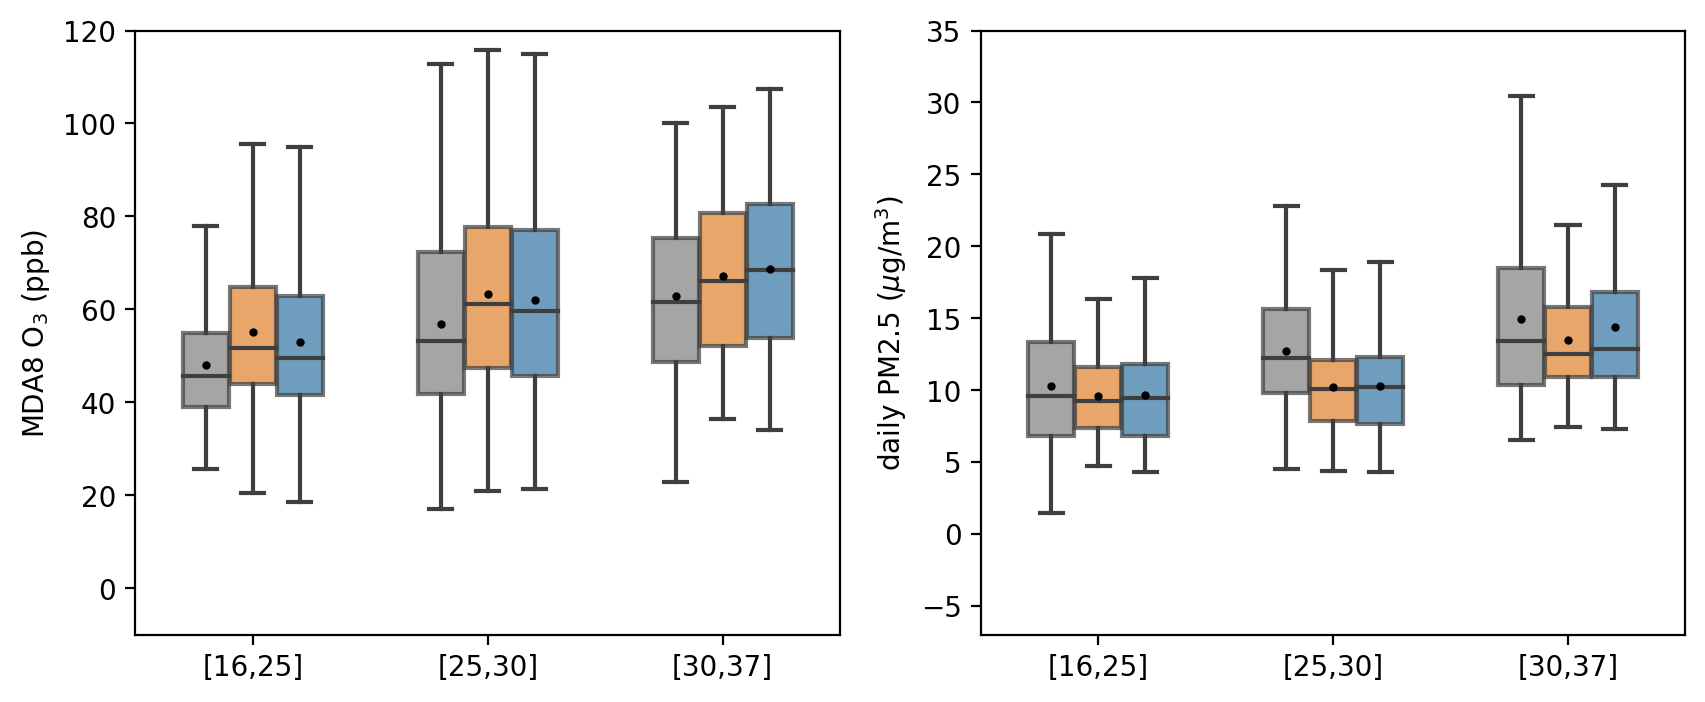

In [44]:
pair_obs = ['OZONE','PM2.5']
pair_wrf = ['o3','PM2_5_DRY']
pair_model = ['O3','PM2.5']

conc_df = pd.DataFrame()
this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = mdas[0].loc[:,pair_obs[i]].values
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'temp_bin_index'] = mdas[0].loc[:,'temp_bin_index']
this_df.loc[:,'longitude'] = mdas[0].reset_index().loc[:,'longitude']
conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = mdas[0].loc[:,pair_wrf[i]].values 
this_df.loc[:,'data_index'] = 1
this_df.loc[:,'temp_bin_index'] = mdas[0].loc[:,'temp_bin_index']
this_df.loc[:,'longitude'] = mdas[0].reset_index().loc[:,'longitude']

conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = mdas[1].loc[:,pair_wrf[i]].values
this_df.loc[:,'data_index'] = 2
this_df.loc[:,'temp_bin_index'] = mdas[1].loc[:,'temp_bin_index']
this_df.loc[:,'con_index'] = 2
this_df.loc[:,'longitude'] = mdas[1].reset_index().loc[:,'longitude']

conc_df = pd.concat([conc_df, this_df])

fig, axs = plt.subplots(1,2,figsize=(10,4),dpi=200)

#conc_df = concatenate_df('O3', 'OZONE', 'o3')
#conc_df = conc_df.reset_index().sort_values(by='longitude')
bplot = sns.boxplot(x='temp_bin_index',y='O3', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                     boxprops=dict(alpha=.7), ax=axs[0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
bplot.set(xticklabels=['[16,25]','[25,30]','[30,37]']) 
axs[0].set_ylabel('MDA8 O$_3$ (ppb)')
axs[0].set_ylim([-10,120])
axs[0].tick_params(axis='x', labelrotation = 0)

bplot = sns.boxplot(x='temp_bin_index',y='PM2.5', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                     boxprops=dict(alpha=.7), ax=axs[1])
bplot.set(xticklabels=['[16,25]','[25,30]','[30,37]']) 
bplot.get_legend().remove()
bplot.set(xlabel=None)
axs[1].set_ylim([-7,35])
axs[1].set_ylabel('daily PM2.5 ($\mu$g/m$^{3}$)')
axs[1].tick_params(axis='x', labelrotation = 0)



Text(0.5, 1.0, 'WRF RACM2B-VCP')

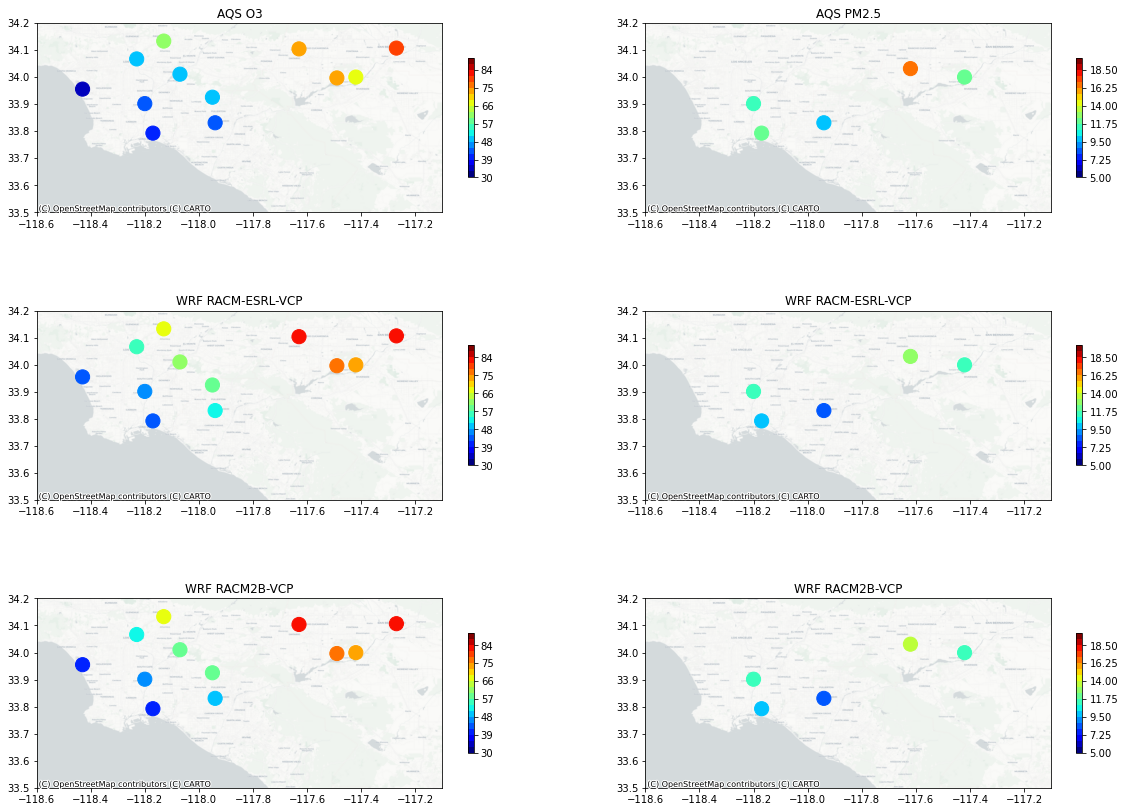

In [146]:
xlim =  [-118.6,-117.1] 
ylim = [33.5,34.2] 
space_avgs = []
for i in range(len(mdas)):
    mda = mdas[i]
    space_avg = mda.groupby(['longitude','latitude']).agg('mean').reset_index()
    space_avg = gpd.GeoDataFrame(
        space_avg, geometry=gpd.points_from_xy(space_avg['longitude'], space_avg['latitude']))
    space_avgs.append(space_avg)
    
#map
space_avg = space_avg.query('cls_indxs<5')
vmax = 90
vmin = 30

nlevels = 21
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap('jet',nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)


fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(20, 15))

#shapefile.plot(ax=axs[0,0], alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[0].plot(ax=axs[0,0], column = 'OZONE', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm)
axs[0,0].set_xlim(xlim)
axs[0,0].set_ylim(ylim)
cx.add_basemap(axs[0,0],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[0,0].set_title('AQS O3',fontsize=12)

#shapefile.plot(ax=axs[1,0],alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[0].plot(ax=axs[1,0], column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, norm=norm)
axs[1,0].set_xlim(xlim)
axs[1,0].set_ylim(ylim)
cx.add_basemap(axs[1,0],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[1,0].set_title('WRF RACM-ESRL-VCP',fontsize=12)

#shapefile.plot(ax=axs[2,0],alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[1].plot(ax=axs[2,0], column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, norm=norm)
axs[2,0].set_xlim(xlim)
axs[2,0].set_ylim(ylim)
cx.add_basemap(axs[2,0],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[2,0].set_title('WRF RACM2B-VCP',fontsize=12)

vmax = 20
vmin = 5

nlevels = 21
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap('jet',nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)


#shapefile.plot(ax=axs[0,1],alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[0].plot(ax=axs[0,1], column = 'PM2.5', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, norm=norm)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(ylim)
cx.add_basemap(axs[0,1],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[0,1].set_title('AQS PM2.5',fontsize=12)

#shapefile.plot(ax=axs[1,1],alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[0].plot(ax=axs[1,1], column = 'PM2_5_DRY', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, norm=norm)
axs[1,1].set_xlim(xlim)
axs[1,1].set_ylim(ylim)
cx.add_basemap(axs[1,1],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[1,1].set_title('WRF RACM-ESRL-VCP',fontsize=12)

#shapefile.plot(ax=axs[2,1],alpha = 0.3, cmap='RdBu', legend=True)
space_avgs[1].plot(ax=axs[2,1], column = 'PM2_5_DRY', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, norm=norm)
axs[2,1].set_xlim(xlim)
axs[2,1].set_ylim(ylim)
cx.add_basemap(axs[2,1],source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[2,1].set_title('WRF RACM2B-VCP',fontsize=12)
#plt.legend()

In [ ]:
space_avgs[0][['longitude','latitude','OZONE','PM2.5']].to_csv('/Users/zhu/Dropbox/Publications/2023-RACM2B_VCP/Figures-v2/aqs_site_list.csv')


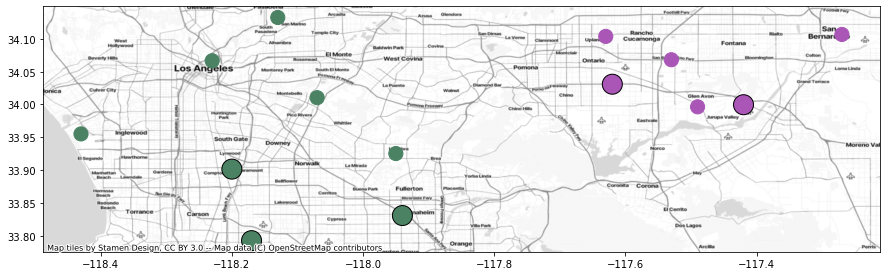

In [14]:
map_only = space_avgs[0]
indx = map_only.loc[:,'longitude']<=-117.8
map_only.loc[indx,'indx'] = 0
indx = map_only.loc[:,'longitude']>-117.8
map_only.loc[indx,'indx'] = 1

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(15, 10))
vmax = 1
vmin = 0

nlevels = 3
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap(sns.diverging_palette(145, 300, s=60, as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)
map_only.plot(ax=axs, column = 'indx' , cmap = cmap,
            markersize = 200, linewidth = 1,norm=norm )

map_only = space_avgs[0].dropna(subset='PM2.5')
map_only.plot(ax=axs, column = 'indx' , cmap = cmap,
            markersize = 400, linewidth = 1,norm=norm,edgecolor='k')
cx.add_basemap(axs,crs='epsg:4326', source=cx.providers.Stamen.TonerLite)

#plt.savefig('/Users/zhu/Dropbox/Publications/2023-RACM2B_VCP/Figures-v2/aqs_observations.pdf', format='pdf')


In [45]:
pair_obs = ['OZONE','PM2.5']
pair_wrf = ['o3','PM2_5_DRY']
pair_model = ['O3','PM2.5']


this_mda_weekdays = []
this_mda_weekends = []
this_mdas = []

for i in range(2):
    indx = mdas[i].loc[:,'weekday']<5
    this_mda_weekday = mdas[i].loc[indx,:].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    indx = mdas[i].loc[:,'weekday']>=5
    this_mda_weekend = mdas[i].loc[indx,:].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    this_mda = mdas[i].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    this_mda_weekdays.append(this_mda_weekday)
    this_mda_weekends.append(this_mda_weekend)
    this_mdas.append(this_mda)
    



Text(0.5, 1.0, 'WRF-Chem RACM2B-VCP')

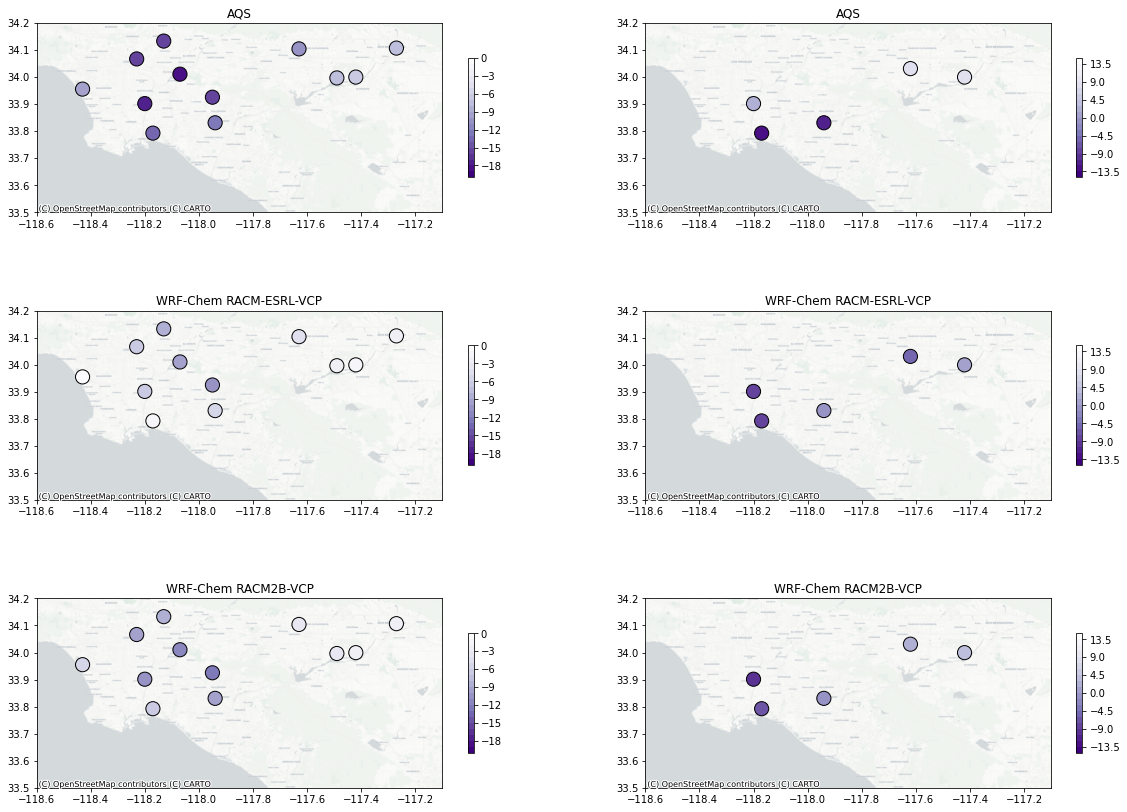

In [10]:
#map
xlim =  [-118.6,-117.1] 
ylim = [33.5,34.2] 
this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[0].loc[:,pair_obs[i]].values-this_mda_weekends[0].loc[:,pair_obs[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[0].loc[:,pair_obs[i]].values
    this_df.loc[:,pair_model[i]+'_ratio'] =this_df.loc[:,pair_model[i]]/this_df.loc[:,pair_model[i]+'_value']*100
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 0
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']
this_df.loc[:,'latitude'] = this_mda_weekdays[0].reset_index().loc[:,'latitude']
this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values

this_df = gpd.GeoDataFrame(
        this_df, geometry=gpd.points_from_xy(this_df['longitude'], this_df['latitude']))


vmax = 0
vmin = -20

nlevels = 21
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)


fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(20, 15))

#shapefile.plot(ax=axs[0,0], alpha = 0.2, cmap='RdBu', legend=True)
this_df.plot(ax=axs[0,0], column = 'O3_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[0,0].set_xlim(xlim)
axs[0,0].set_ylim(ylim)
cx.add_basemap(axs[0,0], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[0,0].set_title('AQS',fontsize=12)

clevel = np.linspace(-15,15,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

#shapefile.plot(ax=axs[0,1], alpha = 0.2, cmap='RdBu', legend=True)
this_df.plot(ax=axs[0,1], column = 'PM2.5_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(ylim)
cx.add_basemap(axs[0,1], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[0,1].set_title('AQS',fontsize=12)


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[0].loc[:,pair_wrf[i]].values-this_mda_weekends[1].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[0].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_ratio'] =this_df.loc[:,pair_model[i]]/this_df.loc[:,pair_model[i]+'_value']*100
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 0
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']
this_df.loc[:,'latitude'] = this_mda_weekdays[0].reset_index().loc[:,'latitude']
this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values

clevel = np.linspace(-20,0,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

this_df = gpd.GeoDataFrame(
        this_df, geometry=gpd.points_from_xy(this_df['longitude'], this_df['latitude']))
#shapefile.plot(ax=axs[1,0], alpha = 0.2, cmap='RdBu', legend=True)

this_df.plot(ax=axs[1,0], column = 'O3_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[1,0].set_xlim(xlim)
axs[1,0].set_ylim(ylim)
cx.add_basemap(axs[1,0], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[1,0].set_title('WRF-Chem RACM-ESRL-VCP',fontsize=12)

clevel = np.linspace(-15,15,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

this_df = gpd.GeoDataFrame(
        this_df, geometry=gpd.points_from_xy(this_df['longitude'], this_df['latitude']))
#shapefile.plot(ax=axs[1,1], alpha = 0.2, cmap='RdBu', legend=True)

this_df.plot(ax=axs[1,1], column = 'PM2.5_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[1,1].set_xlim(xlim)
axs[1,1].set_ylim(ylim)
cx.add_basemap(axs[1,1], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[1,1].set_title('WRF-Chem RACM-ESRL-VCP',fontsize=12)

this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[1].loc[:,pair_wrf[i]].values-this_mda_weekends[1].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[1].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_ratio'] =this_df.loc[:,pair_model[i]]/this_df.loc[:,pair_model[i]+'_value']*100
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 0
this_df.loc[:,'longitude'] = this_mda_weekdays[1].reset_index().loc[:,'longitude']
this_df.loc[:,'latitude'] = this_mda_weekdays[1].reset_index().loc[:,'latitude']
this_df.loc[:,'cls_indxs'] = this_mda_weekdays[1].loc[:,'cls_indxs'].values

clevel = np.linspace(-20,0,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

this_df = gpd.GeoDataFrame(
        this_df, geometry=gpd.points_from_xy(this_df['longitude'], this_df['latitude']))
#shapefile.plot(ax=axs[2,0], alpha = 0.2, cmap='RdBu', legend=True)

this_df.plot(ax=axs[2,0], column = 'O3_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[2,0].set_xlim(xlim)
axs[2,0].set_ylim(ylim)
cx.add_basemap(axs[2,0], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[2,0].set_title('WRF-Chem RACM2B-VCP',fontsize=12)

clevel = np.linspace(-15,15,nlevels)
cmap = mpl.cm.get_cmap(sns.color_palette("Purples_r", as_cmap=True),nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

this_df = gpd.GeoDataFrame(
        this_df, geometry=gpd.points_from_xy(this_df['longitude'], this_df['latitude']))
#shapefile.plot(ax=axs[2,1], alpha = 0.2, cmap='RdBu', legend=True)

this_df.plot(ax=axs[2,1], column = 'PM2.5_ratio', cmap = cmap,
            legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 200, linewidth = 1,norm=norm,edgecolor='k')
axs[2,1].set_xlim(xlim)
axs[2,1].set_ylim(ylim)
cx.add_basemap(axs[2,1], source=cx.providers.CartoDB.Positron,crs='epsg:4326')
axs[2,1].set_title('WRF-Chem RACM2B-VCP',fontsize=12)


In [51]:
indx = this_mdas[0]['longitude'] <= -117.8
this_mdas[0].loc[indx,'area indx'] = 'West/Central LA'
indx = this_mdas[0]['longitude'] > -117.8
this_mdas[0].loc[indx,'area indx'] = 'East basin'
indx = this_mdas[1]['longitude'] <= -117.8
this_mdas[1].loc[indx,'area indx'] = 'West/Central LA'
indx = this_mdas[1]['longitude'] > -117.8
this_mdas[1].loc[indx,'area indx'] = 'East basin'
#this_mdas[0].droupby('area indx')[['OZONE','o3']].corr()**2

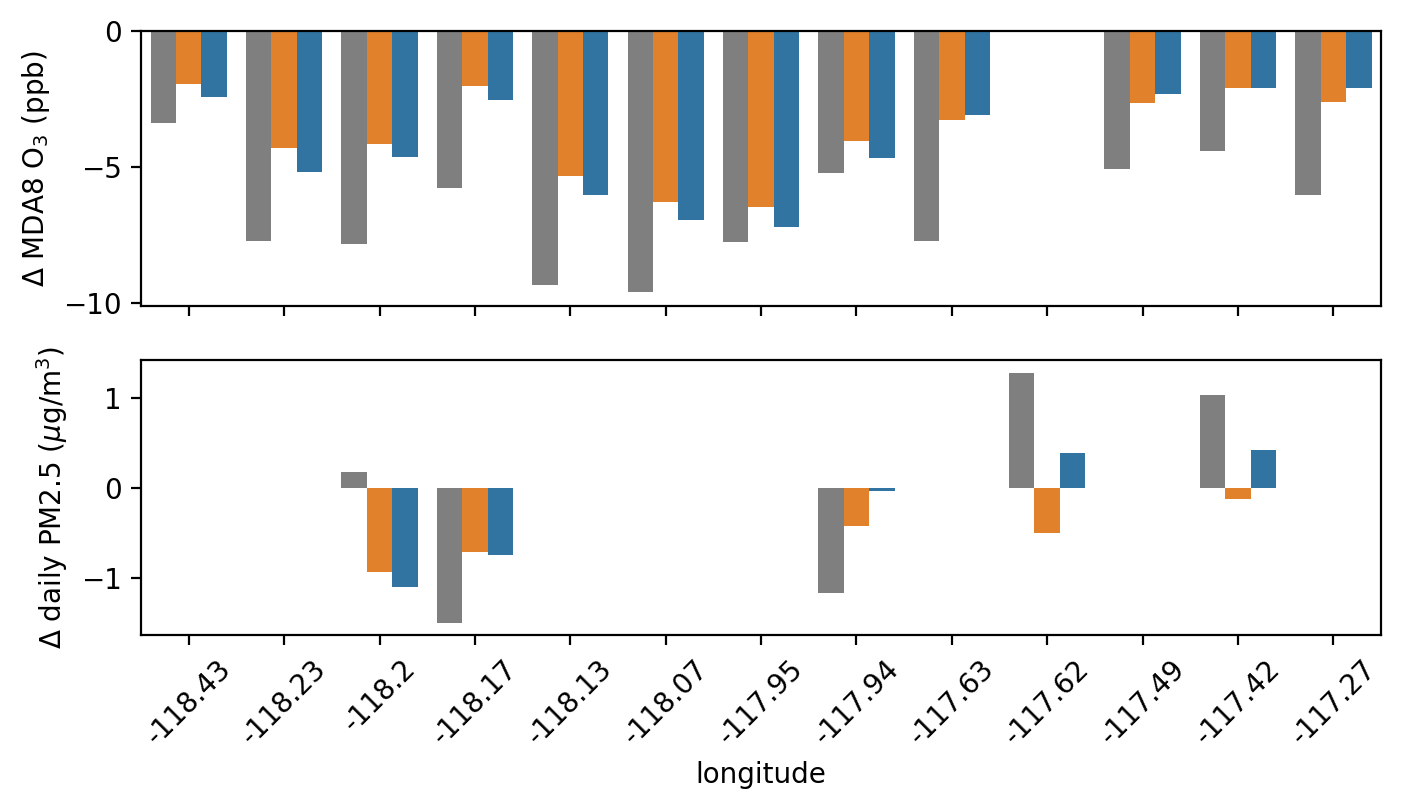

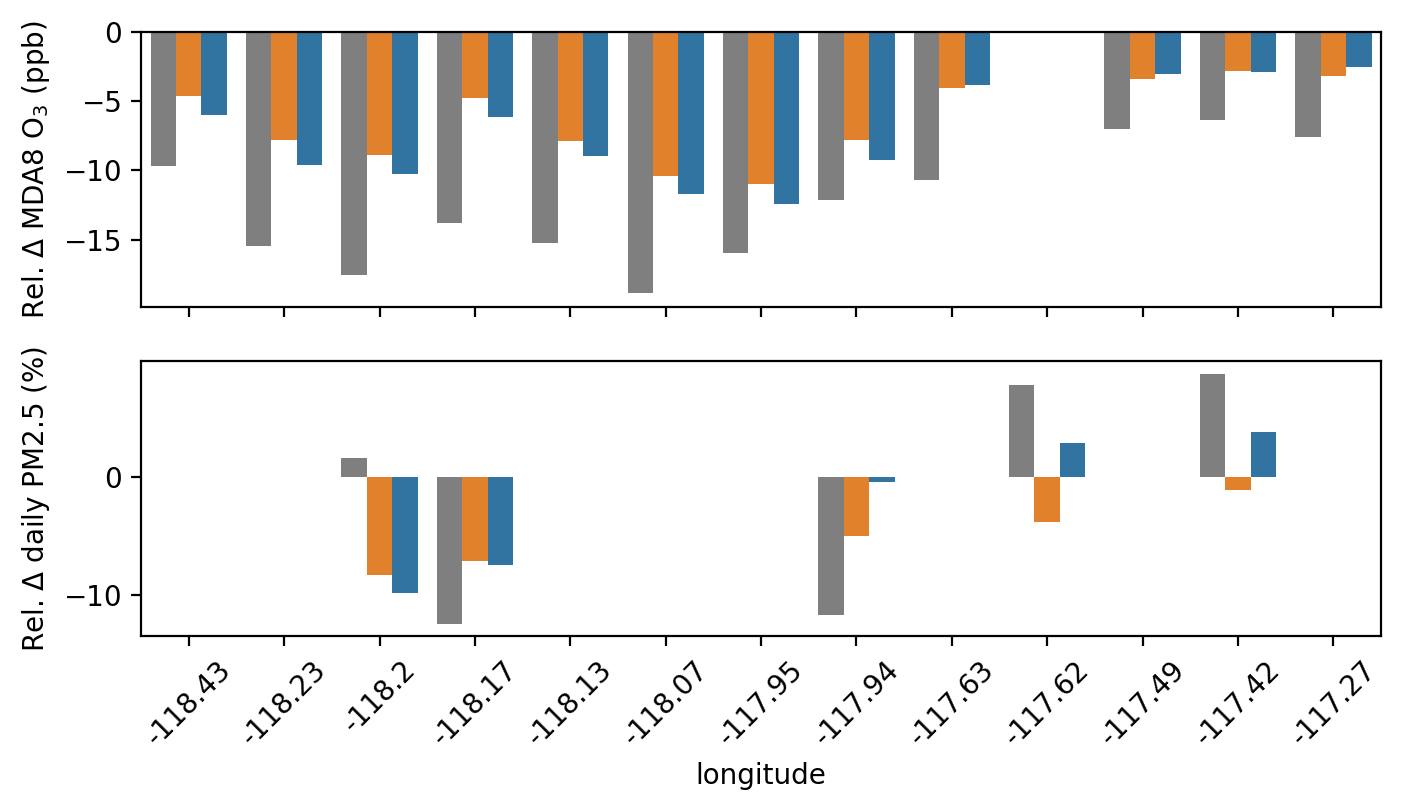

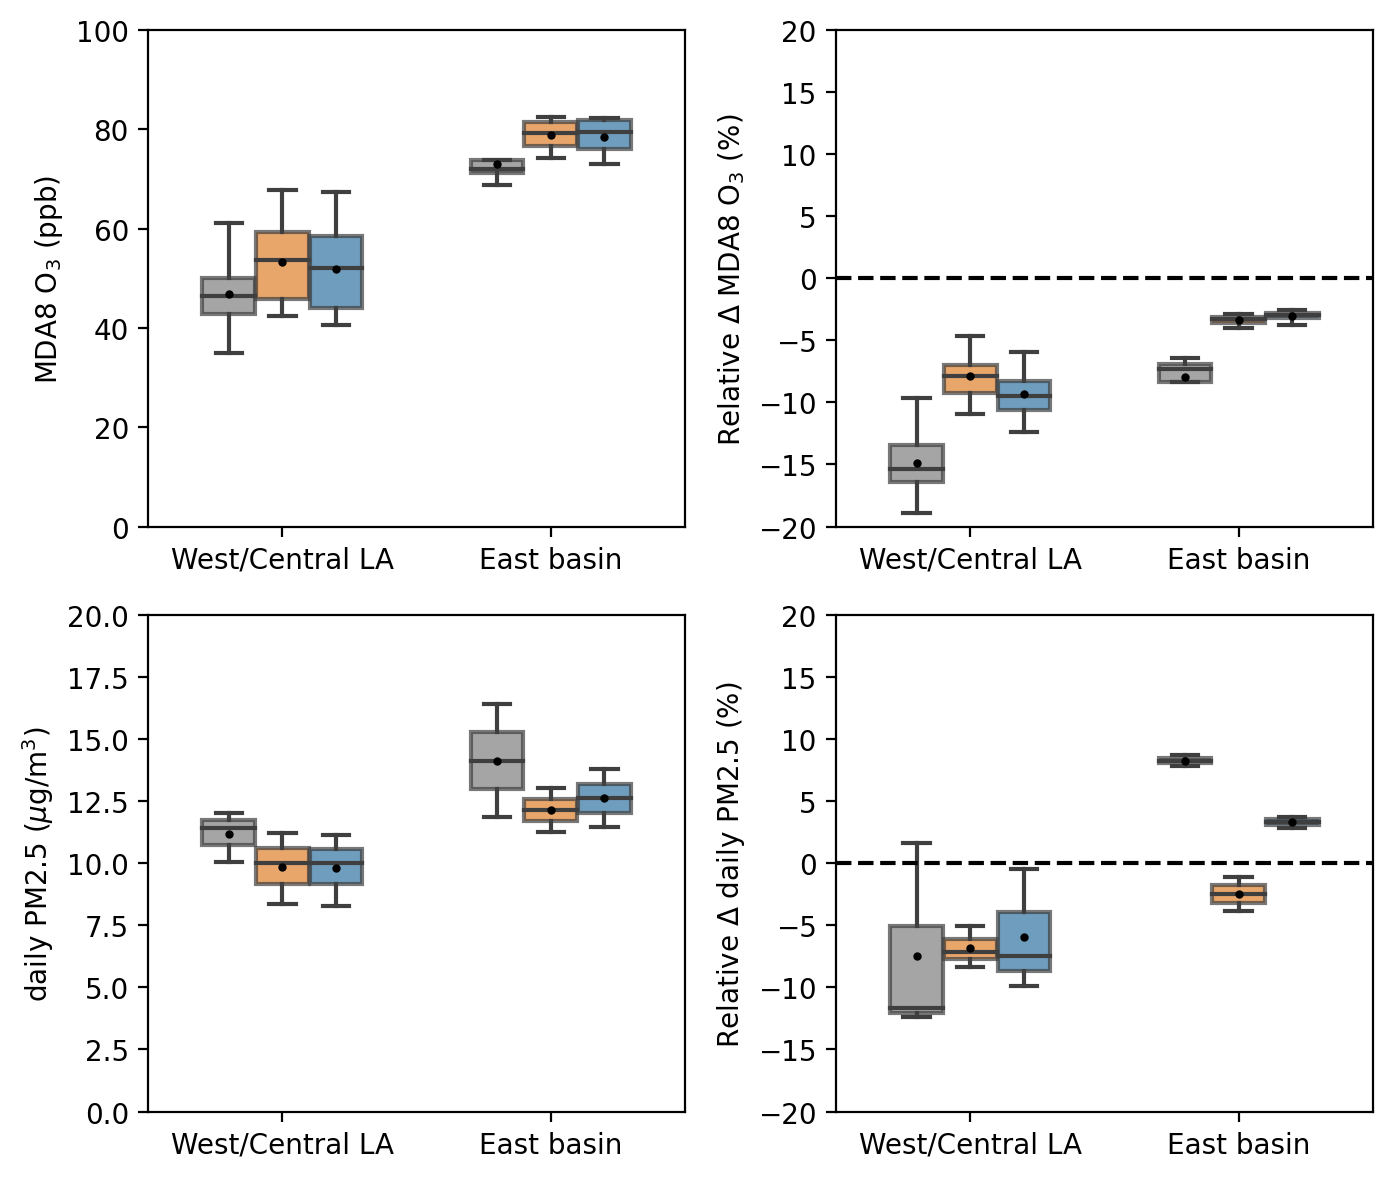

In [11]:
pair_obs = ['OZONE','PM2.5']
pair_wrf = ['o3','PM2_5_DRY']
pair_model = ['O3','PM2.5']


this_mda_weekdays = []
this_mda_weekends = []
this_mdas = []

for i in range(2):
    indx = mdas[i].loc[:,'weekday']<5
    this_mda_weekday = mdas[i].loc[indx,:].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    indx = mdas[i].loc[:,'weekday']>=5
    this_mda_weekend = mdas[i].loc[indx,:].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    this_mda = mdas[i].reset_index().groupby('longitude').mean().reset_index().sort_values(by='longitude')
    this_mda_weekdays.append(this_mda_weekday)
    this_mda_weekends.append(this_mda_weekend)
    this_mdas.append(this_mda)
    
conc_df = pd.DataFrame()
this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[0].loc[:,pair_obs[i]].values-this_mda_weekends[0].loc[:,pair_obs[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[0].loc[:,pair_obs[i]].values
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 0
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[0].loc[:,pair_wrf[i]].values - this_mda_weekends[0].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[0].loc[:,pair_wrf[i]].values

this_df.loc[:,'data_index'] = 1
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 2
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mda_weekdays[1].loc[:,pair_wrf[i]].values - this_mda_weekends[1].loc[:,pair_wrf[i]].values
    this_df.loc[:,pair_model[i]+'_value'] =this_mdas[1].loc[:,pair_wrf[i]].values
this_df.loc[:,'data_index'] = 2
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 2
this_df.loc[:,'longitude'] = this_mda_weekdays[1].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[1].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])

box_colors = ['tab:gray','tab:orange','tab:blue']
conc_df = conc_df.query('cls_indxs<5')

indx = conc_df['longitude'] != -117.53
conc_df = conc_df.loc[indx,:]

indx = conc_df['longitude'] <= -117.8
conc_df.loc[indx,'area indx'] = 'West/Central LA'
indx = conc_df['longitude'] > -117.8
conc_df.loc[indx,'area indx'] = 'East basin'

#ratio
for i in range(2):
    conc_df.loc[:,pair_model[i]+'_ratio'] =conc_df.loc[:,pair_model[i]]/conc_df.loc[:,pair_model[i]+'_value']*100
    
ymaxs=[130]
ymins=[10]

i=0
fig, axs = plt.subplots(2,1,figsize=(8,4),dpi=200)

bplot = sns.barplot(x='longitude',y='O3', hue='data_index', data=conc_df, palette=box_colors, ax=axs[0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
bplot.set(xticklabels=[]) 
#axs.set_ylim([25,130])
axs[0].tick_params(axis='x', labelrotation = 45)
axs[0].set_ylabel('$\Delta$ MDA8 O$_3$ (ppb)')

bplot = sns.barplot(x='longitude',y='PM2.5', hue='data_index', data=conc_df, palette=box_colors, ax=axs[1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
axs[1].set_ylabel('$\Delta$ daily PM2.5 ($\mu$g/m$^{3}$)')
#axs.set_ylim([25,130])
axs[1].tick_params(axis='x', labelrotation = 45)

i=0
fig, axs = plt.subplots(2,1,figsize=(8,4),dpi=200)

bplot = sns.barplot(x='longitude',y='O3_ratio', hue='data_index', data=conc_df, palette=box_colors, ax=axs[0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
bplot.set(xticklabels=[]) 
#axs.set_ylim([25,130])
axs[0].tick_params(axis='x', labelrotation = 45)
axs[0].set_ylabel('Rel. $\Delta$ MDA8 O$_3$ (ppb)')

bplot = sns.barplot(x='longitude',y='PM2.5_ratio', hue='data_index', data=conc_df, palette=box_colors, ax=axs[1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
axs[1].set_ylabel('Rel. $\Delta$ daily PM2.5 (%)')
#axs.set_ylim([25,130])
axs[1].tick_params(axis='x', labelrotation = 45)


fig, axs = plt.subplots(2,2,figsize=(7,6),dpi=200)
#conc_df = concatenate_df('O3', 'OZONE', 'o3')
#conc_df = conc_df.reset_index().sort_values(by='longitude')
bplot = sns.boxplot(x='area indx',y='O3_value', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                     boxprops=dict(alpha=.7), ax=axs[0,0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
#bplot.set(xticklabels=[]) 
axs[0,0].set_ylabel('MDA8 O$_3$ (ppb)')
axs[0,0].set_ylim([0,100])
axs[0,0].tick_params(axis='x', labelrotation = 0)

bplot = sns.boxplot(x='area indx',y='PM2.5_value', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                     boxprops=dict(alpha=.7), ax=axs[1,0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
axs[1,0].set_ylim([0,20])
axs[1,0].set_ylabel('daily PM2.5 ($\mu$g/m$^{3}$)')
axs[1,0].tick_params(axis='x', labelrotation = 0)

bplot = sns.boxplot(x='area indx',y='O3_ratio', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                    boxprops=dict(alpha=.7), ax=axs[0,1])
sns.lineplot(x=[-0.5,1.5],y=[0,0],linestyle='--',color='k', ax=axs[0,1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
axs[0,1].set_ylim([-20,20])
axs[0,1].set_xlim([-0.5,1.5])
axs[0,1].set_ylabel('Relative $\Delta$ MDA8 O$_3$ (%)')
axs[0,1].tick_params(axis='x', labelrotation = 0)

bplot = sns.boxplot(x='area indx',y='PM2.5_ratio', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"2"},
                    boxprops=dict(alpha=.7), ax=axs[1,1])
sns.lineplot(x=[-0.5,1.5],y=[0,0],linestyle='--',color='k', ax=axs[1,1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
#plt.plot([-0,1],[0,0],linestyle='--',color='k')
bplot.set(xlabel=None)
axs[1,1].set_ylim([-20,20])
axs[1,1].set_xlim([-0.5,1.5])
axs[1,1].set_ylabel('Relative $\Delta$ daily PM2.5 (%)')
axs[1,1].tick_params(axis='x', labelrotation = 0)

plt.tight_layout()

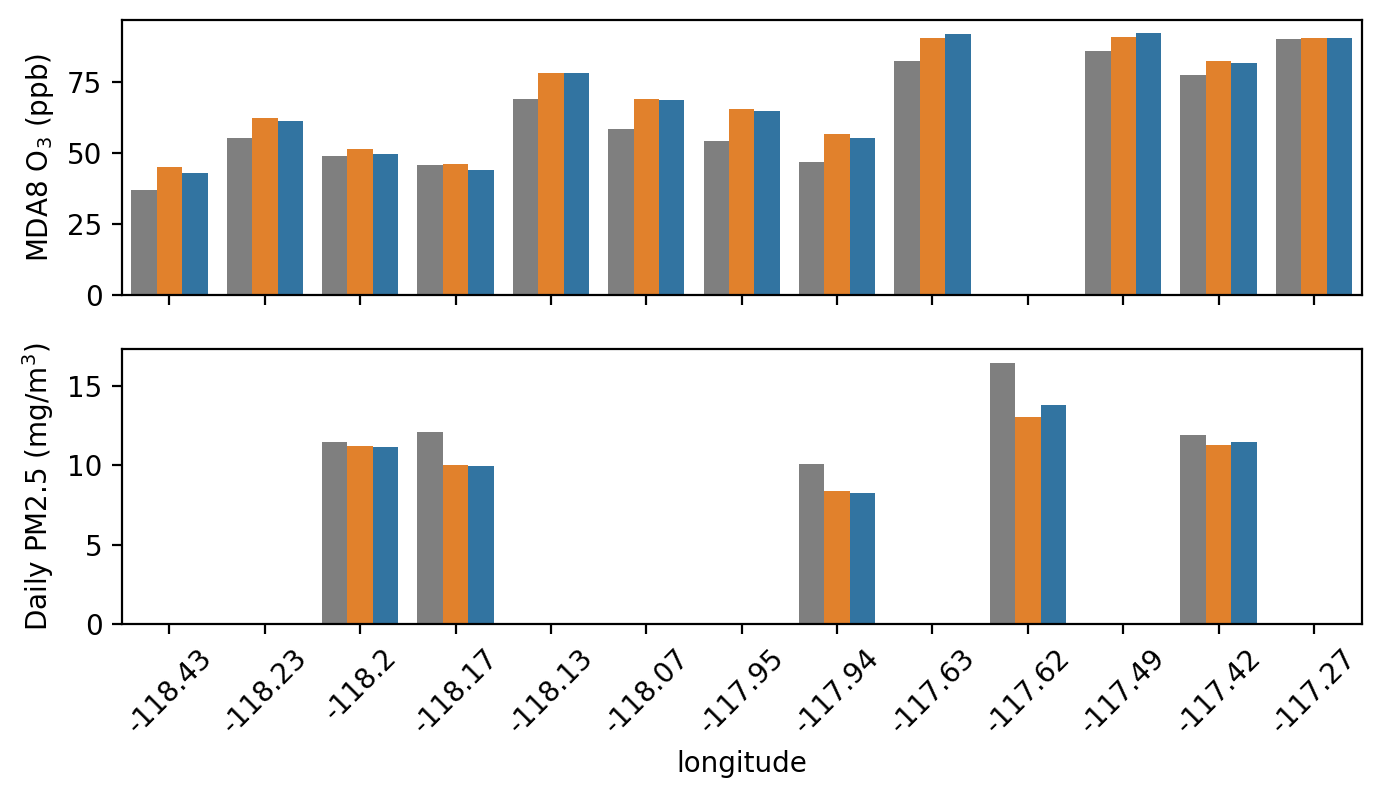

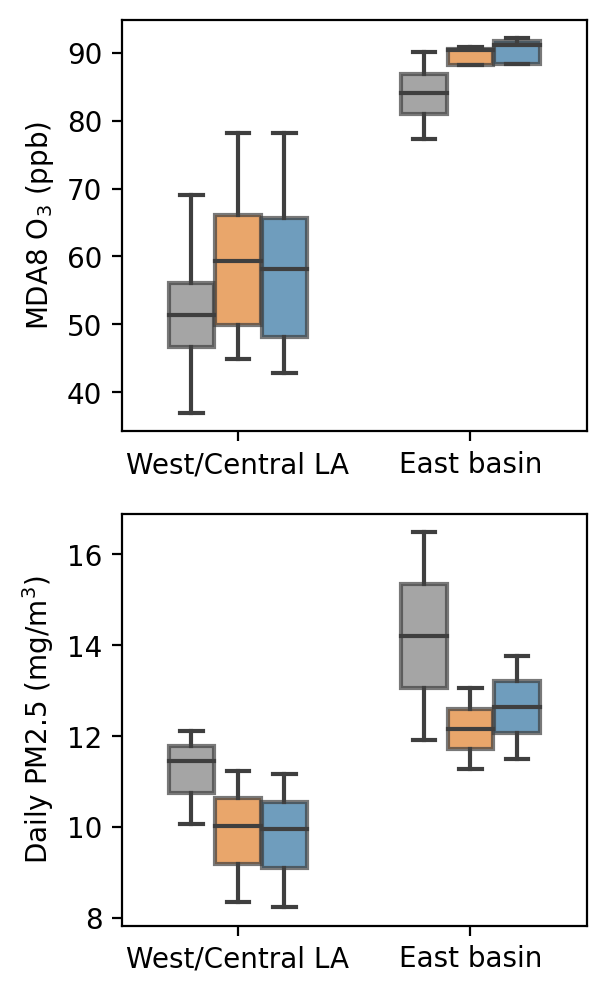

In [109]:
conc_df = pd.DataFrame()
this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mdas[0].loc[:,pair_obs[i]].values
this_df.loc[:,'data_index'] = 0
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 0
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mdas[0].loc[:,pair_wrf[i]].values 
this_df.loc[:,'data_index'] = 1
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 2
this_df.loc[:,'longitude'] = this_mda_weekdays[0].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[0].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])


this_df = pd.DataFrame()
for i in range(2):
    this_df.loc[:,pair_model[i]] = this_mdas[1].loc[:,pair_wrf[i]].values
this_df.loc[:,'data_index'] = 2
this_df.loc[:,'weekday_index'] = 0
this_df.loc[:,'con_index'] = 2
this_df.loc[:,'longitude'] = this_mda_weekdays[1].reset_index().loc[:,'longitude']

this_df.loc[:,'cls_indxs'] = this_mda_weekdays[1].loc[:,'cls_indxs'].values
conc_df = pd.concat([conc_df, this_df])

box_colors = ['tab:gray','tab:orange','tab:blue']
conc_df = conc_df.query('cls_indxs<5')

indx = conc_df['longitude'] != -117.53
conc_df = conc_df.loc[indx,:]

indx = conc_df['longitude'] <= -117.8
conc_df.loc[indx,'area indx'] = 'West/Central LA'
indx = conc_df['longitude'] > -117.8
conc_df.loc[indx,'area indx'] = 'East basin'


ymaxs=[130]
ymins=[10]

i=0
fig, axs = plt.subplots(2,1,figsize=(8,4),dpi=200)

bplot = sns.barplot(x='longitude',y='O3', hue='data_index', data=conc_df, palette=box_colors, ax=axs[0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
bplot.set(xticklabels=[]) 
#axs.set_ylim([25,130])
axs[0].tick_params(axis='x', labelrotation = 45)
axs[0].set_ylabel('MDA8 O$_3$ (ppb)')

bplot = sns.barplot(x='longitude',y='PM2.5', hue='data_index', data=conc_df, palette=box_colors, ax=axs[1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
axs[1].set_ylabel('Daily PM2.5 (mg/m$^{3}$)')
#axs.set_ylim([25,130])
axs[1].tick_params(axis='x', labelrotation = 45)

fig, axs = plt.subplots(2,1,figsize=(3,6),dpi=200)
#conc_df = concatenate_df('O3', 'OZONE', 'o3')
#conc_df = conc_df.reset_index().sort_values(by='longitude')
bplot = sns.boxplot(x='area indx',y='O3', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, boxprops=dict(alpha=.7), ax=axs[0])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
#bplot.set(xticklabels=[]) 
axs[0].set_ylabel('MDA8 O$_3$ (ppb)')
axs[0].tick_params(axis='x', labelrotation = 0)

bplot = sns.boxplot(x='area indx',y='PM2.5', hue='data_index', data=conc_df, 
                showfliers = False, width=0.6, palette=box_colors, boxprops=dict(alpha=.7), ax=axs[1])
#axs.set_xticklabels(axs.get_xticks(), rotation = 45)
bplot.get_legend().remove()
bplot.set(xlabel=None)
axs[1].set_ylabel('Daily PM2.5 (mg/m$^{3}$)')
axs[1].tick_params(axis='x', labelrotation = 0)